In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.power(x, 2)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


In [4]:
# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr=0.1, activation='sigmoid'):
        self.W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.b2 = np.zeros((1, output_size))
        self.lr = lr
        self.loss_history = []

        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        else:
            raise ValueError("Unsupported activation function")

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = sigmoid(self.z2)
        return self.output

    def backward(self, X, y):
        error = y - self.output
        d_output = error * sigmoid_derivative(self.output)
        d_hidden = d_output.dot(self.W2.T) * self.activation_derivative(self.a1)
        self.W2 += self.a1.T.dot(d_output) * self.lr
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.lr
        self.W1 += X.T.dot(d_hidden) * self.lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.lr

    def train(self, X, y, epochs=10000):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            loss = np.mean(np.square(y - self.output))
            self.loss_history.append(loss)

    def predict(self, X):
        return np.round(self.forward(X))



Training with Activation Function: SIGMOID
Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]

Training with Activation Function: TANH
Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]

Training with Activation Function: RELU
Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


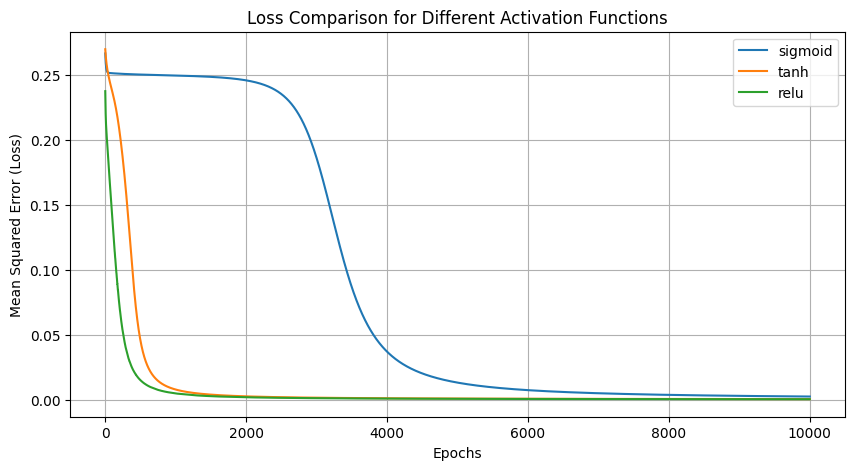

In [8]:
# Dataset: XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Train for Different Activations
activations = ['sigmoid', 'tanh', 'relu']
loss_results = {}

for act in activations:
    print(f"\nTraining with Activation Function: {act.upper()}")
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, lr=0.1, activation=act)
    nn.train(X, y, epochs=10000)
    loss_results[act] = nn.loss_history

    preds = nn.predict(X)
    print("Predictions:\n", preds)


# Plot Loss Comparison
plt.figure(figsize=(10,5))
for act in activations:
    plt.plot(loss_results[act], label=act)
plt.title("Loss Comparison for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.legend()
plt.grid(True)
plt.show()